In [19]:
from pathlib import Path
from matplotlib import pyplot as plt
import numpy as np
import scipy
print(f'Scipy version is {scipy.__version__}, needs to be 1.3.1 or greater')
from scipy.io import wavfile as wav
%matplotlib inline

Scipy version is 1.3.1, needs to be 1.3.1 or greater


sample rate = 44100


[(0, 3000)]

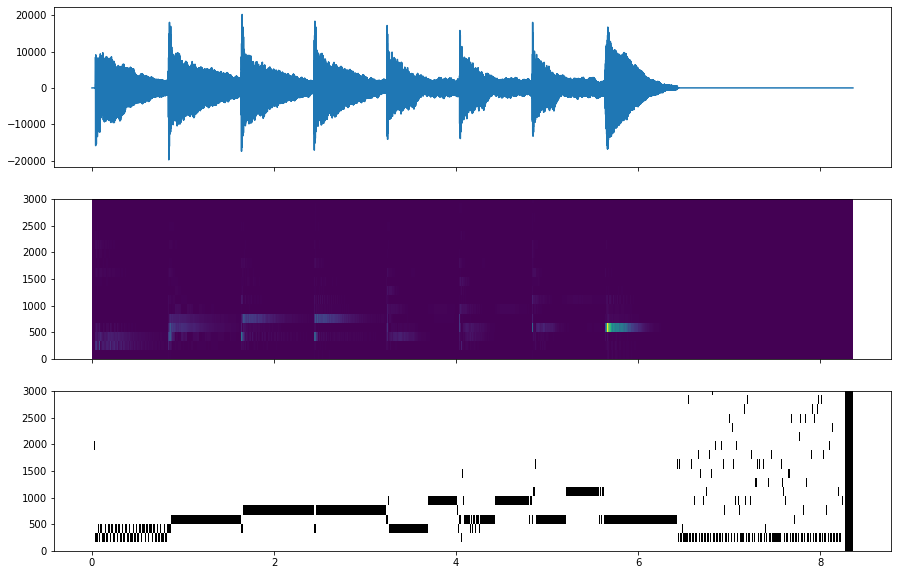

In [109]:
wav_fname = Path('./data/original_music.wav')
samplerate, data = wav.read(wav_fname)
data = data.mean(axis = 1) #convert from stereo to mono audio 
print(f'sample rate = {samplerate}')

from scipy import signal

f, axes = plt.subplots(3,1,figsize = (15,10), sharex = 'all')
f, t, Sxx = signal.spectrogram(data, fs = samplerate)


axes[0].plot(time, data)
axes[1].pcolormesh(t, f, Sxx)

#at each time make the largest frequency bin 1 and the rest 0
largest = Sxx == Sxx.max(axis = 0)

axes[2].pcolormesh(t, f, largest, cmap = 'Greys')


axes[1].set(ylim = (0, 3000))
axes[2].set(ylim = (0, 3000))

/home/tch14/conda-envs/scipy1.4.1/lib/python3.6/site-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


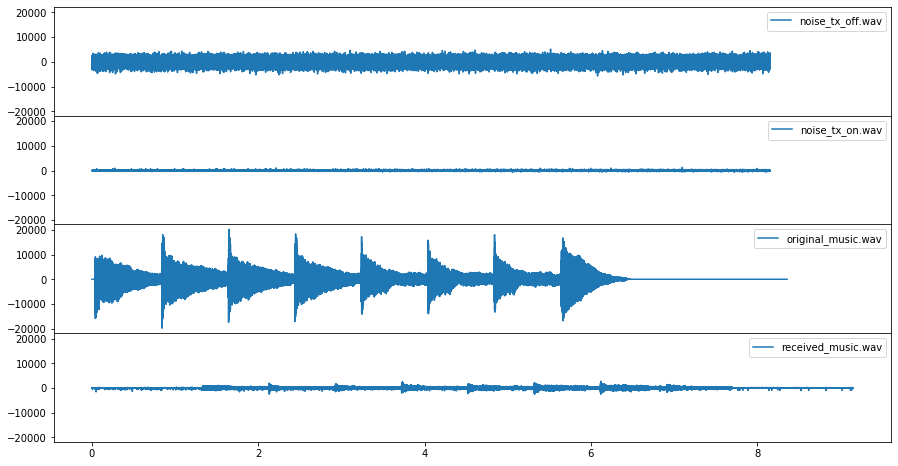

In [110]:
names = !ls ./data

f, axes = plt.subplots(len(names), 1, figsize = (15, 2*len(names)), 
                       sharex = 'all', 
                       sharey = 'all',
                      gridspec_kw = dict(hspace = 0))

for ax, name in zip(axes, names):
    wav_fname = Path('./data') / name
    samplerate, data = wav.read(wav_fname)
    data = data.mean(axis = 1) #convert from stereo to mono audio 
    time = np.arange(data.shape[0]) / samplerate
    ax.plot(time, data, label = name)
    ax.legend()